## Project Details
- Gathered Data From: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
- Based on 60 different sonar frequencies, object is labeled as ROCK (R) OR SEA MINE(M)
- Goal: Create model to predict R or M based on the 60 frequencies

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

## Import Data

In [2]:
df = pd.read_csv('sonar.all-data.csv')

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
len(df)

208

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

## Exploratory Analysis

<AxesSubplot:>

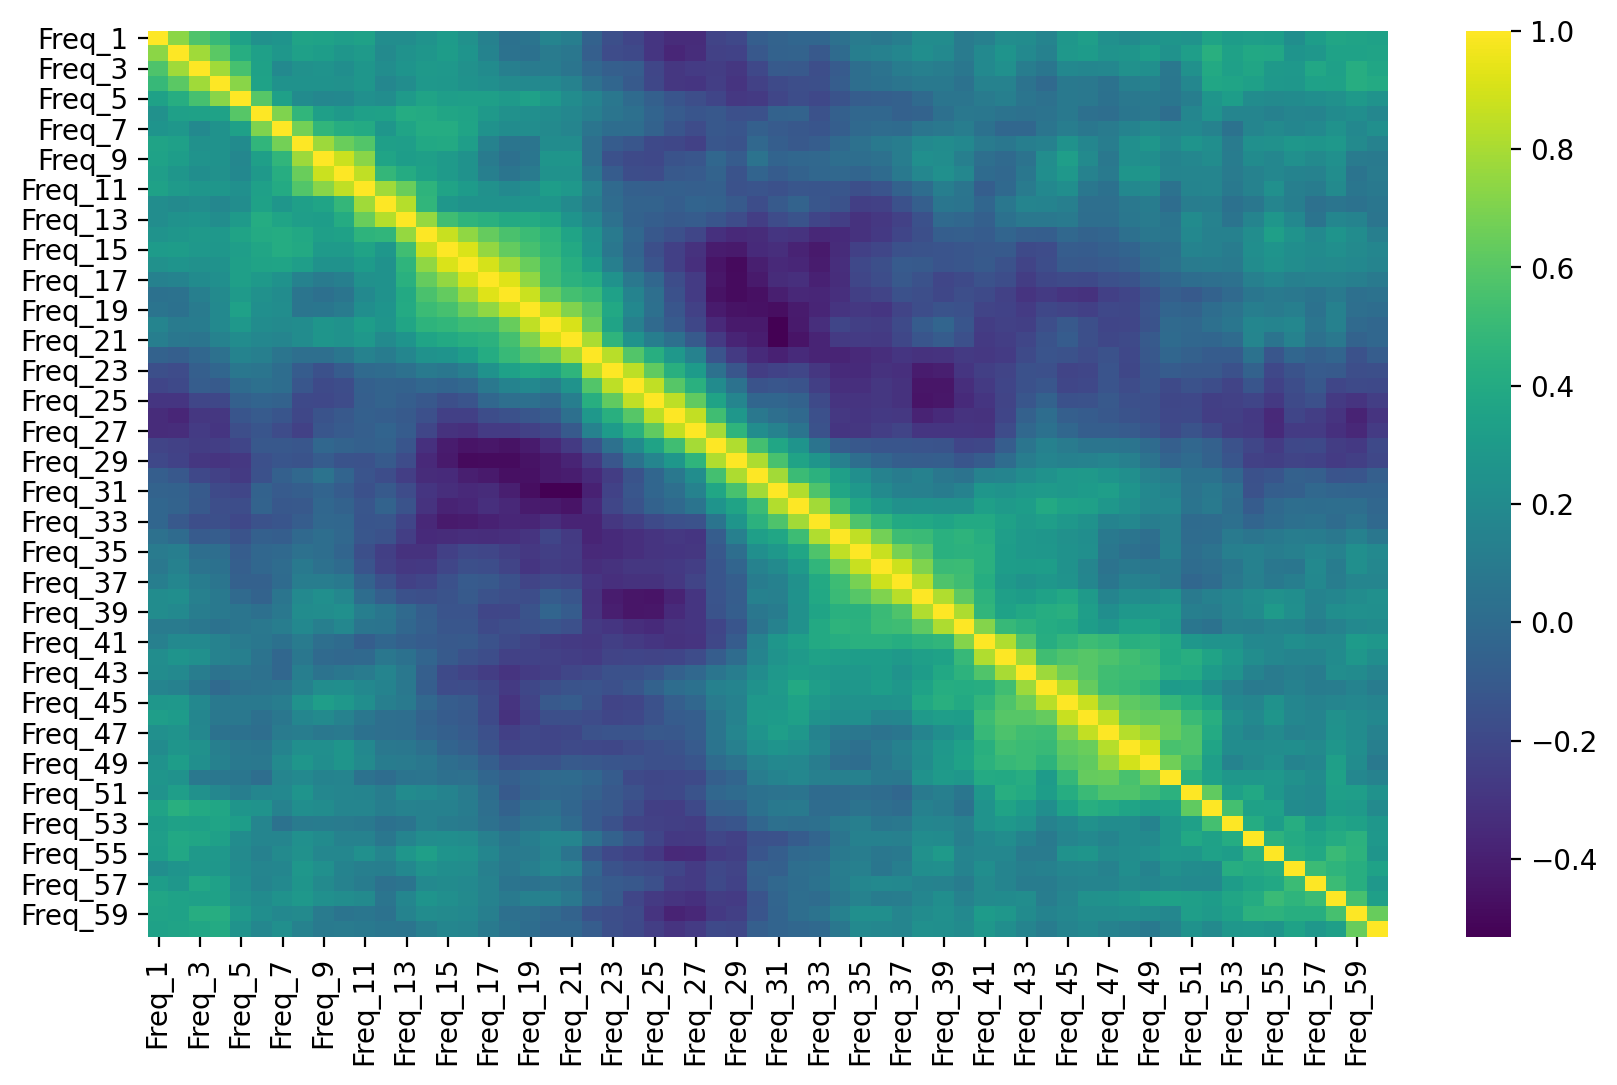

In [6]:
plt.figure(figsize=(10,6), dpi=200)
sns.heatmap(df.corr(), cmap='viridis')

## Turning Label Column to 0's and 1s

In [7]:
df['Label'] = df.Label.map(dict(R=0,M=1))

In [8]:
df.corr().nlargest(6, 'Label')

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
Label,0.271694,0.231238,0.192195,0.250638,0.222232,0.132327,0.114748,0.189314,0.321448,0.341142,...,0.288651,0.141871,0.182687,0.095639,0.129341,0.000933,0.184191,0.130826,0.090055,1.000000
Freq_11,0.344058,0.297065,0.274610,0.271881,0.231684,0.333570,0.396588,0.584583,0.728063,0.853140,...,0.165748,0.084801,0.142572,0.228991,0.122332,0.103405,0.193358,0.067726,0.089695,0.432855
Freq_12,0.210861,0.194102,0.214807,0.175381,0.211657,0.344451,0.274432,0.328329,0.363404,0.485392,...,0.117699,0.042263,0.078457,0.164590,0.115658,0.030732,0.065273,0.044614,0.071364,0.392245
Freq_49,0.247560,0.313995,0.223074,0.133294,0.088128,0.080729,0.194720,0.271422,0.222135,0.264885,...,0.319286,0.150871,0.195826,0.230033,0.155186,0.173098,0.328238,0.209152,0.088640,0.351312
Freq_10,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358,0.341142
Freq_45,0.279968,0.285716,0.180734,0.087824,0.089202,0.085468,0.110813,0.240176,0.320573,0.287459,...,0.350208,0.181292,0.162879,0.242757,0.170750,0.144281,0.167337,0.178402,0.157181,0.339406


In [9]:
len(df[df['Label']==1])

111

In [10]:
len(df[df['Label']==0])

97

## Separating Features & Labels

In [11]:
X = df.drop('Label', axis=1)
y = df['Label']

## Train | Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)

## Setting Up Pipeline

In [13]:
## Scaler
scaler = StandardScaler()
## KNN Model
knn = KNeighborsClassifier()

In [14]:
operations = [('scaler', scaler), ('knn', knn)]

In [15]:
pipe = Pipeline(operations)

## GridSearchCV to Find Optimal K-Value

In [16]:
## Test on K-Values from 1 to 20
k_values = list(range(1,20))

In [17]:
param_grid ={'knn__n_neighbors':k_values}

In [18]:
## Scoring can be changes,
## Since data is relatively balanced, I decided to use accuracy as metric to determine
knn_model = GridSearchCV(pipe, param_grid, cv=10, scoring = 'accuracy')

## Fitting KNN Model

In [19]:
## No need to scale, pipeline did it for us
knn_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [20]:
## KNN Value of 1 was best estimator
knn_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=2))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=2),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 2,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [21]:
## Mean 'accuracy'
## As K increases accuracy decreases
knn_model.cv_results_['mean_test_score']

array([0.85087719, 0.85614035, 0.82894737, 0.83479532, 0.80292398,
       0.81315789, 0.77573099, 0.78070175, 0.77046784, 0.76403509,
       0.71081871, 0.74239766, 0.70964912, 0.74766082, 0.72631579,
       0.71549708, 0.7374269 , 0.73187135, 0.74766082])

## Performance Metrics

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
## Predictions for Holdout 10% Test Set
## if this was not our final model, we would not test on the holdout until we figured best model by testing on scaled_X_test
final_model = knn_model.predict(X_test)

In [24]:
final_model

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1],
      dtype=int64)

In [25]:
confusion_matrix(y_test,final_model)

array([[ 9,  1],
       [ 1, 10]], dtype=int64)

In [26]:
print(classification_report(y_test,final_model))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.91      0.91      0.91        11

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

